# HW-5: Metropolis-Hastings

In [2]:
install.packages(c("mvtnorm"))

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [3]:
library(mvtnorm)
library(ggplot2)

## 0. Function definition

In [4]:
normal_proposal <- function(x, sigma){
    return(rmvnorm(1, mean=rep(0, length(x)), sigma=2.4^2*sigma/length(x)))
}
normal_proposal_prob <- function(x, sigma){
    return(dmvnorm(x=x, mean=rep(0, length(x)), sigma=2.4^2*sigma/length(x)))
}
bivariate_target <- function(x){
    return(dmvnorm(x=x, mean=rep(0, length(x)), sigma=matrix(c(2, -1, -1, 2), nrow=2)))
}

In [5]:
log_prob <- function(x1, x0){
    return(log(mhs_proposal_prob(x0, mhs_sigma)) + log(mhs_target(x1)))
}

MetropolisHastings <- function(x0, niter=1000, nburn=100, burnin=TRUE){
    # fine-tune variance
    mhs_sigma <<- diag(nrow=length(x0))
    if (burnin){
        nbiter <- 10
        burn_samps <- matrix(NA, nrow=nburn*nbiter, ncol=length(x0))
        for (j in 1:nbiter){
            for (k in 1:nburn){
                i <- (j-1)*nburn+k
                x1 <- mhs_proposal(x0, mhs_sigma)
                logr <- log_prob(x1, x0) - log_prob(x0, x1) 
                if (log(runif(1)) < logr) x0 <- x1
                burn_samps[i,] <- x0
            }
            mhs_sigma <<- var(burn_samps[1:i,])
        }
    }
    # run algorithm
    mhs_samps <- matrix(NA, nrow=niter, ncol=length(x0))
    for (i in 1:niter){
      x1 <- mhs_proposal(x0, mhs_sigma)
      logr <- log_prob(x1, x0) - log_prob(x0, x1) 
      if (log(runif(1)) < logr) x0 <- x1
      mhs_samps[i,] <- x0
    }
    return(mhs_samps)
}

In [6]:
mhs_target <- bivariate_target
mhs_proposal <- normal_proposal
mhs_proposal_prob <- normal_proposal_prob
bi_samps <- MetropolisHastings(c(0, 0), niter=10000)

In [7]:
bi_samps <- as.data.frame(bi_samps)
names(bi_samps) <- c("x0", "x1")

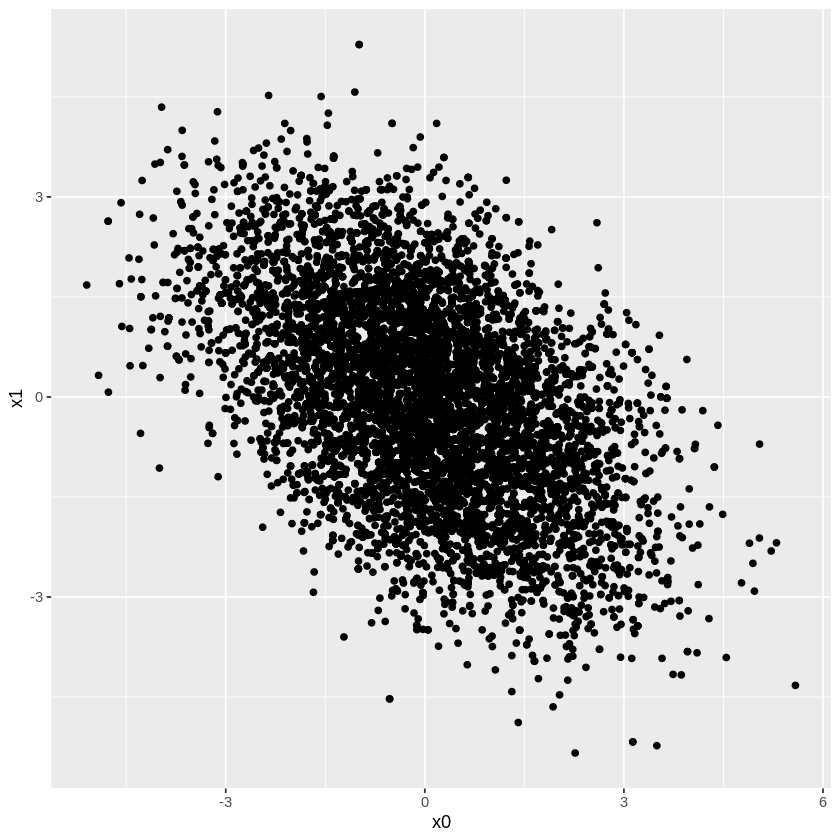

In [8]:
g <- ggplot(bi_samps, aes(x = x0, y = x1)) +
     geom_point()
g

## 1. Analysis

In [9]:
nsamps <- 1000
nrepeats <- 5

In [10]:
res_no_burn <- list()
for (ai in 1:5){
    mhs_target <- bivariate_target
    mhs_proposal <- normal_proposal
    mhs_proposal_prob <- normal_proposal_prob
    no_burn <- MetropolisHastings(c(0, 0), niter=nsamps, burn=FALSE)
    res_no_burn[[ai]] <- no_burn
}

In [11]:
res_burn <- list()
for (ai in 1:5){
    mhs_target <- bivariate_target
    mhs_proposal <- normal_proposal
    mhs_proposal_prob <- normal_proposal_prob
    burn <- MetropolisHastings(c(0, 0), niter=nsamps)
    res_burn[[ai]] <- MetropolisHastings(c(0, 0), niter=nsamps, )
}

In [12]:
# common metrics
res_no_burn

0.47696121,-1.0403714
-0.63510309,1.0465145
-0.63510309,1.0465145
-0.63510309,1.0465145
-0.05624105,1.7248625
-1.06190860,0.7489710
-0.74427870,-0.8718605
2.74682714,-1.1340174
-0.56670667,2.3665111
0.89990227,-0.9726932
0.89990227,-0.9726932
